In [167]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd

In [168]:
text_x = 0
text_y = -1.4
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'


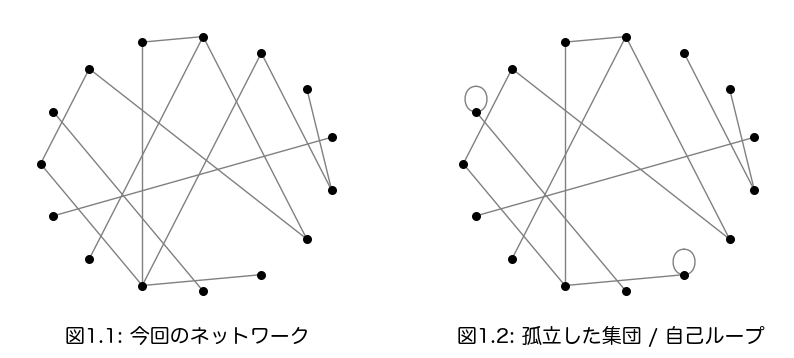

In [176]:
sequence = nx.random_powerlaw_tree_sequence(15, tries=5000, seed=77)
G = nx.configuration_model(sequence, seed=81)
actual_degrees = [d for v, d in G.degree()]
G.add_edge(3, 10)
G.add_edge(3, 12)
G.remove_edges_from(nx.selfloop_edges(G))

options = {
    'node_color': 'black',
    'node_size': 30,
    'width': 1,
    'style': 'solid',
    'edge_color': 'grey',
}
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.text(text_x, text_y, "図1.1: 今回のネットワーク", fontsize="x-large", ha='center')
nx.draw_shell(G, with_labels=False, **options, label='fads')

G.remove_edge(3, 10)
G.add_edge(5,5)
G.add_edge(14,14)
plt.subplot(1,2,2)
plt.text(text_x, text_y, "図1.2: 孤立した集団 / 自己ループ", fontsize="x-large", ha='center')
nx.draw_shell(G, with_labels=False, **options)

plt.savefig("images/fig1.png")
plt.show(G)

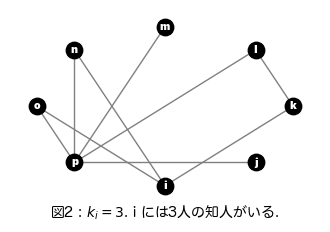

In [170]:
G = nx.Graph()
G.add_edges_from(
    [('o', 'p'), ('o', 'i'), ('j', 'p'), ('k', 'i'), ('k', 'l'),
     ('p', 'm'), ('p', 'n'), ('p', 'l'), ('i', 'n')])

options = {
    'node_color': 'black',
    'node_size': 140,
    'width': 1,
    'style': 'solid',
    'edge_color': 'grey',
    'font_color':'white',
    'font_size': 8,
    'font_family': '.SF Compact'
}
plt.figure(figsize=(4, 2.5))
plt.text(text_x, text_y, "図2 : $k_i=3$. i には3人の知人がいる.", fontsize="medium", ha='center')
nx.draw_shell(G, with_labels=True, **options)
plt.savefig("images/fig2.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


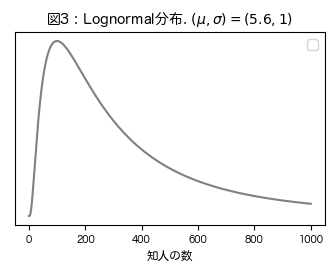

In [177]:
from scipy.stats import lognorm, norm

mu = 5.60
scale = math.exp(mu)
sigma = 1 
rv = lognorm(s=sigma, loc=0, scale=scale)

x = np.linspace(0,1000,1000)
plt.figure(figsize=(4, 2.5))
plt.title(f'図3 : Lognormal分布. $(\mu, \sigma)=({mu}, {sigma})$',fontsize='medium')
plt.xticks(fontsize='x-small')
plt.yticks([],color="w")
plt.xlabel(f"知人の数",fontsize='small')
plt.plot(x,rv.pdf(x), color='grey')
plt.legend()
plt.savefig("images/fig3.png", bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


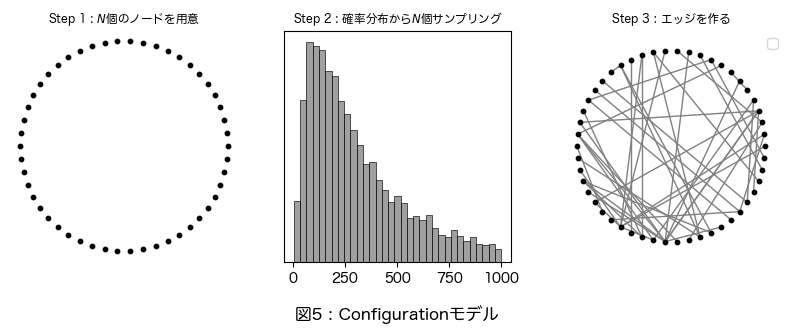

In [172]:
options = {
    'node_color': 'black',
    'node_size': 10,
    'width': 1,
    'style': 'solid',
    'edge_color': 'grey',
}
plt.figure(figsize=(10, 3))

G = nx.path_graph(50)
G.remove_edges_from(list(G.edges()))
plt.subplot(1,3,1)
plt.title('Step 1 : $N$個のノードを用意', fontsize='small')
nx.draw_shell(G, with_labels=False, **options)

mode = 5.60
sigma = 1.00
num_samples = 10000
samples = lognorm.rvs(s=sigma, loc=0, scale=scale, size=num_samples, random_state=37)
samples = [i for i in samples if i <= 1000]
plt.subplot(1,3,2)
plt.yticks([],color="w")
plt.title('Step 2 : 確率分布から$N$個サンプリング', fontsize='small')
plt.text(500, -200, "図5 : Configurationモデル", fontsize="large", ha='center', va='bottom')
sns.histplot(samples, binwidth=30, color='grey')

sequence = nx.random_powerlaw_tree_sequence(50, tries=5000, seed=77)
G = nx.configuration_model(sequence, seed=81)
actual_degrees = [d for v, d in G.degree()]
G.add_edge(3, 10)
G.add_edge(3, 12)
G.remove_edges_from(nx.selfloop_edges(G))
plt.subplot(1,3,3)
plt.title('Step 3 : エッジを作る', fontsize='small')
nx.draw_shell(G, with_labels=False, **options)

plt.legend()
plt.savefig("images/fig5.png", bbox_inches='tight')

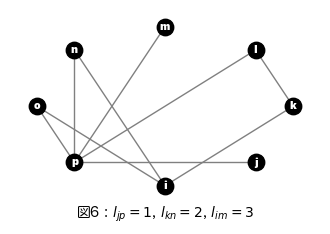

In [178]:
G = nx.Graph()
G.add_edges_from(
    [('o', 'p'), ('o', 'i'), ('j', 'p'), ('k', 'i'), ('k', 'l'),
     ('p', 'm'), ('p', 'n'), ('p', 'l'), ('i', 'n')])

options = {
    'node_color': 'black',
    'node_size': 140,
    'width': 1,
    'style': 'solid',
    'edge_color': 'grey',
    'font_color':'white',
    'font_size': 8,
    'font_family': '.SF Compact'
}
plt.figure(figsize=(4, 2.5))
plt.text(text_x, text_y, "図6 : $l_{jp}=1$, $l_{kn}=2$, $l_{im}=3$", fontsize="medium", ha='center')
nx.draw_shell(G, with_labels=True, **options)
plt.savefig("images/fig6.png")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:702: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(self.xlim)


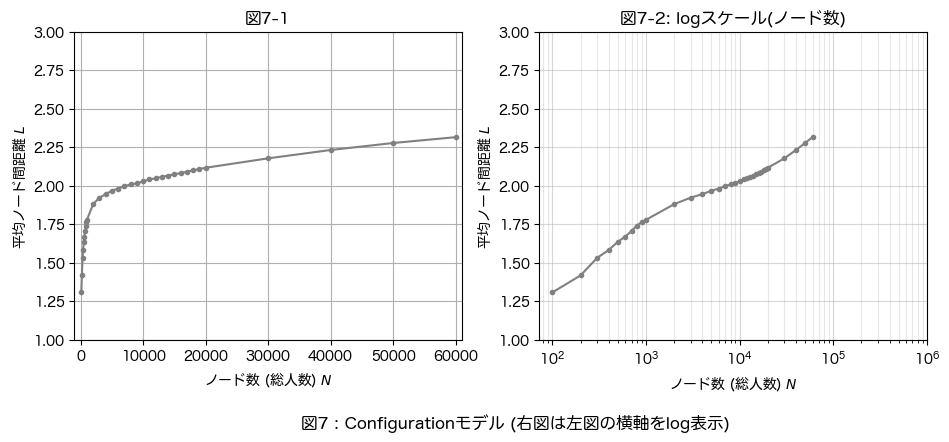

In [175]:
df = pd.read_csv('./node-distance.csv')

fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)

axes[0,1].text(40, 0.4, "図7 : Configurationモデル (右図は左図の横軸をlog表示)", fontsize="large", ha='center', va='bottom')
options={
    'marker': '.',
    'title': '図7-1',
    'xlim':[-1000,61000],
    'ylim':[1,3],
    'xlabel': 'ノード数 (総人数) $N$',
    'ylabel':'平均ノード間距離 $L$',
    'legend':False,
    'grid':True,
    'color':'grey'
}
df.plot(x='node_num', y='average_path_length_of_max_component', **options, ax=axes[0,0], figsize=(11, 4))

options={
    'logx': True,
    'marker': '.',
    'title': '図7-2: logスケール(ノード数)',
    'xlim':[0,10**6],
    'ylim':[1,3],
    'xlabel': 'ノード数 (総人数) $N$',
    'ylabel':'平均ノード間距離 $L$',
    'legend':False,
    'color':'grey'
}
df.plot(x='node_num', y='average_path_length_of_max_component', **options,  ax=axes[0,1], figsize=(11, 4))
axes[0,1].grid(which="minor", alpha=0.3)
axes[0,1].grid(which="major", alpha=0.5)

plt.savefig("images/fig7.png",  bbox_inches='tight')